# TASK #1: UNDERSTAND THE PROBLEM STATMENT AND BUSINESS CASE

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
!pip install plotly
!pip install --upgrade nbformat
!pip install nltk # Install the Natural Language Toolkit (nltk) library for NLP tasks
!pip install spacy # spaCy is an open-source software library for advanced natural language processing
!pip install WordCloud  # Install the WordCloud library for generating word clouds
!pip install gensim # Gensim is an open-source library for unsupervised topic modeling and natural language processing
# Install Gensim, a library for topic modeling and document similarity analysis
import nltk
nltk.download('punkt')  # Import nltk and download the 'punkt' tokenizer models

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re #regular expression
from nltk.stem import PorterStemmer, WordNetLemmatizer  # Importing classes for stemming (PorterStemmer) and lemmatization (WordNetLemmatizer)
from nltk.corpus import stopwords  # Importing the stopwords corpus to filter out common stopwords in text
from nltk.tokenize import word_tokenize, sent_tokenize  # Importing functions for tokenizing text into words and sentences

import gensim  # Importing the Gensim library for topic modeling and document similarity
from gensim.utils import simple_preprocess  # Importing a utility function for basic text preprocessing (e.g., lowercasing, tokenization)
from gensim.parsing.preprocessing import STOPWORDS  # Importing a list of stopwords from Gensim for text preprocessing

# import keras  # Commented out import of Keras, as TensorFlow's Keras API is being used instead

from tensorflow.keras.preprocessing.text import one_hot, Tokenizer  # Importing functions for text preprocessing (one-hot encoding and tokenization)
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Importing a function to pad sequences to the same length

from tensorflow.keras.models import Sequential  # Importing the Sequential model class for building neural network models
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional  # Importing common layers used in deep learning models (e.g., Dense, LSTM, Conv1D)

from tensorflow.keras.models import Model  # Importing the Model class for creating complex models with multiple inputs/outputs

#if use JypterNotebook the below code is necessary to visualize the graph
#from jupyterthemes import jtplot  # Importing jtplot to customize Jupyter Notebook plotting style
#jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)  # Setting the theme to 'monokai' with specific plot context and options

# setting the style of the notebook to be monokai theme
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
# load the data
df_true = pd.read_csv("True.csv",skiprows=[9409])



In [5]:
# Initialize a variable to track the row number
row_number = 0

try:
    # Use the 'chunksize' parameter to read the file in smaller parts
    for chunk in pd.read_csv("Fake.csv", chunksize=1):
        row_number += 1
except pd.errors.ParserError as e:
    print(f"Error at row {row_number}: {e}")


In [6]:
df_fake = pd.read_csv("Fake.csv")
# Skip beaucse ParserError: Error tokenizing data. C error: EOF inside string starting at row 3437

# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [7]:
df_true.describe()

,title,text,subject,date
count,9408,9408,9408,9408
unique,9301,9357,1,584
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"November 9, 2016"
freq,14,8,9408,115


In [8]:
df_fake.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [9]:
# add a target class column to indicate whether the news is real or fake
df_true['isfake'] = 1
df_true.head()

,title,text,subject,date,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [10]:
df_fake['isfake'] = 0
df_fake.head()

,title,text,subject,date,isfake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [11]:
# Concatenate Real and Fake News
df = pd.concat([df_true, df_fake]).reset_index(drop = True)
df

,title,text,subject,date,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
32884,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
32885,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
32886,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
32887,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [12]:
df.drop(columns = ['date'], inplace = True)

In [13]:
# combine title and text together
df['original'] = df['title'] + ' ' + df['text']
df.head()

,title,text,subject,isfake,original
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,Trump wants Postal Service to charge 'much mor...


In [14]:
df['original'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

In [15]:
df['original'][1]

'U.S. military to accept transgender recruits on Monday: Pentagon WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trump’s administration decided not to appeal rulings that blocked his transgender ban. Two federal appeals courts, one in Washington and one in Virginia, last week rejected the administration’s request to put on hold orders by lower court judges requiring the military to begin accepting transgender recruits on Jan. 1. A Justice Department official said the administration will not challenge those rulings. “The Department of Defense has announced that it will be releasing an independent study of these issues in the coming weeks. So rather than litigate this interim appeal before that occurs, the administration has decided to wait for DOD’s study and will continue to defend the president’s lawful authority in District 

In [16]:
df_true_len = len(df_true)
df_fake_len = len(df_fake)
df_len = len(df)

print(f"True News Total: {df_true_len}")
print(f"Fake News Total: {df_fake_len}")
print(f"Difference: {df_true_len - df_fake_len}")
print(f"ConcatinationNews Total: {df_len}")


True News Total: 9408
Fake News Total: 23481
Difference: -14073
ConcatinationNews Total: 32889


# TASK #4: PERFORM DATA CLEANING

In [17]:
# download stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [19]:
# Remove stopwords and remove words with 2 or less characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)

    return result

In [20]:
#df['original'] = df['original'].astype(str)

In [21]:
# Apply the function to the dataframe
df['clean'] = df['original'].apply(preprocess)

In [22]:
# Show original news
df['original'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

In [23]:
# Show cleaned up news after removing stopwords
print(df['clean'][0])

['budget', 'fight', 'looms', 'republicans', 'flip', 'fiscal', 'script', 'washington', 'reuters', 'head', 'conservative', 'republican', 'faction', 'congress', 'voted', 'month', 'huge', 'expansion', 'national', 'debt', 'cuts', 'called', 'fiscal', 'conservative', 'sunday', 'urged', 'budget', 'restraint', 'keeping', 'sharp', 'pivot', 'republicans', 'representative', 'mark', 'meadows', 'speaking', 'face', 'nation', 'drew', 'hard', 'line', 'federal', 'spending', 'lawmakers', 'bracing', 'battle', 'january', 'return', 'holidays', 'wednesday', 'lawmakers', 'begin', 'trying', 'pass', 'federal', 'budget', 'fight', 'likely', 'linked', 'issues', 'immigration', 'policy', 'november', 'congressional', 'election', 'campaigns', 'approach', 'republicans', 'seek', 'control', 'congress', 'president', 'donald', 'trump', 'republicans', 'want', 'budget', 'increase', 'military', 'spending', 'democrats', 'want', 'proportional', 'increases', 'defense', 'discretionary', 'spending', 'programs', 'support', 'educati

In [24]:
df

,title,text,subject,isfake,original,clean
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,"As U.S. budget fight looms, Republicans flip t...","[budget, fight, looms, republicans, flip, fisc..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...,"[military, accept, transgender, recruits, mond..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,Senior U.S. Republican senator: 'Let Mr. Muell...,"[senior, republican, senator, mueller, washing..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,FBI Russia probe helped by Australian diplomat...,"[russia, probe, helped, australian, diplomat, ..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,Trump wants Postal Service to charge 'much mor...,"[trump, wants, postal, service, charge, amazon..."
...,...,...,...,...,...,...
32884,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,0,McPain: John McCain Furious That Iran Treated ...,"[mcpain, john, mccain, furious, iran, treated,..."
32885,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,0,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,"[justice, yahoo, settles, mail, privacy, class..."
32886,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,0,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,"[sunnistan, allied, safe, zone, plan, territor..."
32887,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,0,How to Blow $700 Million: Al Jazeera America F...,"[blow, million, jazeera, america, finally, cal..."


In [25]:
# Obtain the total words present in the dataset
list_of_words = []
for i in df.clean:
    for j in i:
        list_of_words.append(j)


In [26]:
list_of_words

['budget',
 'fight',
 'looms',
 'republicans',
 'flip',
 'fiscal',
 'script',
 'washington',
 'reuters',
 'head',
 'conservative',
 'republican',
 'faction',
 'congress',
 'voted',
 'month',
 'huge',
 'expansion',
 'national',
 'debt',
 'cuts',
 'called',
 'fiscal',
 'conservative',
 'sunday',
 'urged',
 'budget',
 'restraint',
 'keeping',
 'sharp',
 'pivot',
 'republicans',
 'representative',
 'mark',
 'meadows',
 'speaking',
 'face',
 'nation',
 'drew',
 'hard',
 'line',
 'federal',
 'spending',
 'lawmakers',
 'bracing',
 'battle',
 'january',
 'return',
 'holidays',
 'wednesday',
 'lawmakers',
 'begin',
 'trying',
 'pass',
 'federal',
 'budget',
 'fight',
 'likely',
 'linked',
 'issues',
 'immigration',
 'policy',
 'november',
 'congressional',
 'election',
 'campaigns',
 'approach',
 'republicans',
 'seek',
 'control',
 'congress',
 'president',
 'donald',
 'trump',
 'republicans',
 'want',
 'budget',
 'increase',
 'military',
 'spending',
 'democrats',
 'want',
 'proportional',
 '

In [27]:
len(list_of_words)

6936554

In [28]:
# Obtain the total number of unique words
total_words = len(list(set(list_of_words)))
total_words

92248

In [29]:
# join the words into a string
df['clean_joined'] = df['clean'].apply(lambda x: " ".join(x))

In [30]:
df

,title,text,subject,isfake,original,clean,clean_joined
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,"As U.S. budget fight looms, Republicans flip t...","[budget, fight, looms, republicans, flip, fisc...",budget fight looms republicans flip fiscal scr...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...,"[military, accept, transgender, recruits, mond...",military accept transgender recruits monday pe...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,Senior U.S. Republican senator: 'Let Mr. Muell...,"[senior, republican, senator, mueller, washing...",senior republican senator mueller washington r...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,FBI Russia probe helped by Australian diplomat...,"[russia, probe, helped, australian, diplomat, ...",russia probe helped australian diplomat washin...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,Trump wants Postal Service to charge 'much mor...,"[trump, wants, postal, service, charge, amazon...",trump wants postal service charge amazon shipm...
...,...,...,...,...,...,...,...
32884,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,0,McPain: John McCain Furious That Iran Treated ...,"[mcpain, john, mccain, furious, iran, treated,...",mcpain john mccain furious iran treated sailor...
32885,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,0,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,"[justice, yahoo, settles, mail, privacy, class...",justice yahoo settles mail privacy class actio...
32886,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,0,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,"[sunnistan, allied, safe, zone, plan, territor...",sunnistan allied safe zone plan territorial bo...
32887,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,0,How to Blow $700 Million: Al Jazeera America F...,"[blow, million, jazeera, america, finally, cal...",blow million jazeera america finally calls qui...


In [31]:
df['clean_joined'][0]

'budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats saying need government raise 

In [32]:
df['clean_joined'][1]

'military accept transgender recruits monday pentagon washington reuters transgender people allowed time enlist military starting monday ordered federal courts pentagon said friday president donald trump administration decided appeal rulings blocked transgender federal appeals courts washington virginia week rejected administration request hold orders lower court judges requiring military begin accepting transgender recruits justice department official said administration challenge rulings department defense announced releasing independent study issues coming weeks litigate interim appeal occurs administration decided wait study continue defend president lawful authority district court meantime official said speaking condition anonymity september pentagon said created panel senior officials study implement directive trump prohibit transgender individuals serving defense department submit plan trump lawyers representing currently serving transgender service members aspiring recruits sai

In [33]:
df['clean_joined'][2]

'senior republican senator mueller washington reuters special counsel investigation links russia president trump election campaign continue interference despite calls trump administration allies republican lawmakers shut prominent republican senator said sunday lindsey graham serves senate armed forces judiciary committees said department justice special counsel robert mueller needs carry russia investigation political interference investigation forward investigation conducted political influence graham said face nation news program need mueller think right right time question russia interfered election trump campaign links ordinated effort loomed white house trump took office january shows sign receding trump prepares second year power despite intensified rhetoric trump allies recent weeks accusing mueller team bias republican president trump undercut supporters interview week york times said expected mueller going fair russia role election question possible links trump campaign focus

# TASK #5: VISUALIZE CLEANED UP DATASET

In [34]:
df

,title,text,subject,isfake,original,clean,clean_joined
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,"As U.S. budget fight looms, Republicans flip t...","[budget, fight, looms, republicans, flip, fisc...",budget fight looms republicans flip fiscal scr...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...,"[military, accept, transgender, recruits, mond...",military accept transgender recruits monday pe...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,Senior U.S. Republican senator: 'Let Mr. Muell...,"[senior, republican, senator, mueller, washing...",senior republican senator mueller washington r...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,FBI Russia probe helped by Australian diplomat...,"[russia, probe, helped, australian, diplomat, ...",russia probe helped australian diplomat washin...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,Trump wants Postal Service to charge 'much mor...,"[trump, wants, postal, service, charge, amazon...",trump wants postal service charge amazon shipm...
...,...,...,...,...,...,...,...
32884,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,0,McPain: John McCain Furious That Iran Treated ...,"[mcpain, john, mccain, furious, iran, treated,...",mcpain john mccain furious iran treated sailor...
32885,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,0,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,"[justice, yahoo, settles, mail, privacy, class...",justice yahoo settles mail privacy class actio...
32886,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,0,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,"[sunnistan, allied, safe, zone, plan, territor...",sunnistan allied safe zone plan territorial bo...
32887,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,0,How to Blow $700 Million: Al Jazeera America F...,"[blow, million, jazeera, america, finally, cal...",blow million jazeera america finally calls qui...


<Axes: xlabel='count', ylabel='subject'>

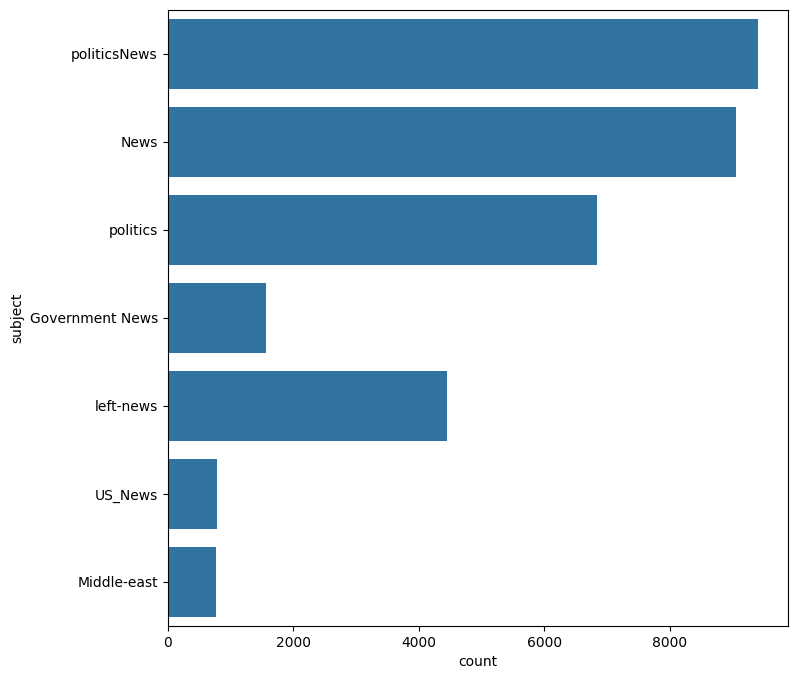

In [35]:
# plot the number of samples in 'subject'
plt.figure(figsize = (8, 8))
sns.countplot(y = "subject", data = df)

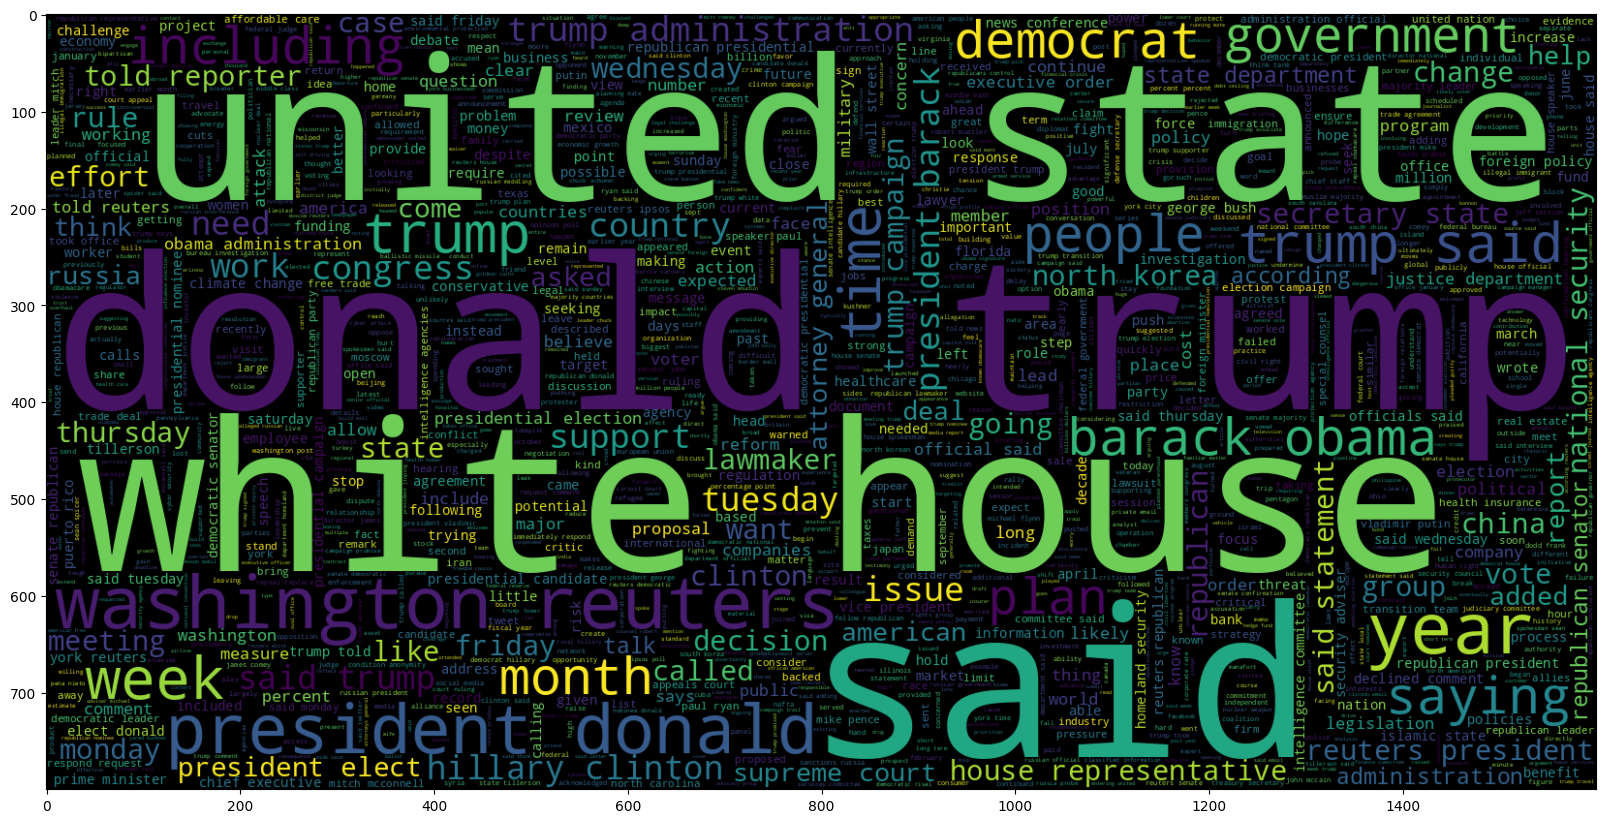

In [36]:
# plot the word cloud for text that is Real
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.isfake == 1].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

In [ ]:
# plot the word cloud for text that is Fake
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.isfake == 0].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

In [ ]:
# length of maximum document will be needed to create word embeddings
maxlen = -1
for doc in df.clean_joined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is =", maxlen)

In [ ]:
# visualize the distribution of number of words in a text
import plotly.express as px
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.clean_joined], nbins = 100)
fig.show()

In [ ]:
df.columns

In [ ]:
# Plot class distribution
df['isfake'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Articles')
plt.xticks(ticks=[0, 1], labels=['Fake', 'Real'], rotation=0)
plt.show()


In [ ]:
from textblob import TextBlob

# Calculate sentiment polarity
df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot sentiment scores
fig = px.histogram(df, x='sentiment', color='isfake',
                   labels={'sentiment': 'Sentiment Score', 'isfake': 'Class'},
                   title='Sentiment Score Distribution')
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
# Calculate text length
df['text_length'] = df['text'].apply(lambda x: len(x.split()))

# Plot text length distribution
fig = px.histogram(df, x='text_length', color='isfake',
                   labels={'text_length': 'Number of Words', 'isfake': 'Class'},
                   title='Text Length Distribution')
fig.update_layout(bargap=0.2)
fig.show()


# TASK #6: PREPARE THE DATA BY PERFORMING TOKENIZATION AND PADDING

In [ ]:
# split data into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.clean_joined, df.isfake, test_size = 0.2,random_state = 42)

In [ ]:
from nltk import word_tokenize

In [ ]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)


In [ ]:
print("The encoding for document\n",df.clean_joined[0],"\n is : ",train_sequences[0])

In [ ]:
# Add padding can either be maxlen = 4406 or smaller number maxlen = 40 seems to work well based on results
padded_train = pad_sequences(train_sequences,maxlen = 40, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 40, truncating = 'post')

In [49]:
for i,doc in enumerate(padded_train[:2]):
     print("The padded encoding for document",i+1," is : ",doc)

The padded encoding for document 1  is :  [ 1773  1672  2702  2386    36   138   326  1773  1672   372  2386    36
    71   981    82 33060  1291     2  3003     2   115   198   405 13881
  2238  6158   572  1672   855  3846 24925   698  4336   760   101    71
    20  1484    70  2044]
The padded encoding for document 2  is :  [ 2180 10519  9421    58  2677    44   272  3332   124    95    44 56552
 10519   140   195    44   411     7     1    15     5   270   270   272
  1564    16 56553   902  2051  5964 21688  3968 26433  3095 14709   604
  4071 13882  1212    44]


# TASK #7: BUILD AND TRAIN THE MODEL

## Model0 : Bidirectional LSTM model
The model uses a **Bidirectional LSTM model** with an embedding layer followed by a Bidirectional LSTM for capturing sequential patterns, and dense layers for binary classification.

In [ ]:
# Sequential Model
model = Sequential()

# embeddidng layer
#model.add(Embedding(total_words, output_dim = 128))
model.add(Embedding(total_words, output_dim = 240))


# Bi-Directional RNN and LSTM
model.add(Bidirectional(LSTM(128)))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

In [ ]:
total_words

In [ ]:
y_train = np.asarray(y_train)

In [53]:
# train the model
history = model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 4)

Epoch 1/4
370/370 ━━━━━━━━━━━━━━━━━━━━ 205s 539ms/step - acc: 0.9464 - loss: 0.1352 - val_acc: 0.9985 - val_loss: 0.0072
Epoch 2/4
370/370 ━━━━━━━━━━━━━━━━━━━━ 199s 537ms/step - acc: 0.9994 - loss: 0.0029 - val_acc: 0.9989 - val_loss: 0.0056
Epoch 3/4
370/370 ━━━━━━━━━━━━━━━━━━━━ 203s 540ms/step - acc: 1.0000 - loss: 1.1115e-04 - val_acc: 0.9992 - val_loss: 0.0048
Epoch 4/4
370/370 ━━━━━━━━━━━━━━━━━━━━ 198s 536ms/step - acc: 1.0000 - loss: 1.2481e-04 - val_acc: 0.9962 - val_loss: 0.0112


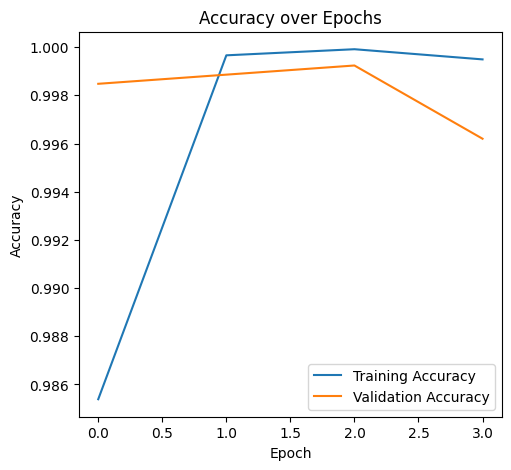

In [54]:
# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

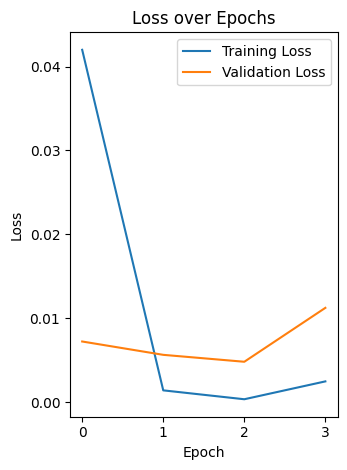

In [55]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

## Model1 :  CNN-BiLSTM model
The model combines a 1D Convolutional Neural Network (CNN) with a Bidirectional LSTM (BiLSTM). The CNN captures local patterns in the input sequences, while the BiLSTM captures temporal dependencies in both directions. This hybrid approach is effective for tasks like text classification, where both local patterns and context matter.

In [56]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Dense, Bidirectional, LSTM

# Define the input layer
input_layer = Input(shape=(40,))

# Embedding layer
embedding_layer = Embedding(total_words, output_dim=240)(input_layer)

# Convolutional layer
conv_layer = Conv1D(filters=128, kernel_size=5, activation='relu')(embedding_layer)

# Max pooling layer
pooling_layer = MaxPooling1D(pool_size=4)(conv_layer)

# Bi-Directional LSTM
bi_lstm_layer = Bidirectional(LSTM(128))(pooling_layer)

# Dense layers
dense_layer = Dense(128, activation='relu')(bi_lstm_layer)
output_layer = Dense(1, activation='sigmoid')(dense_layer)

# Define the model
model1 = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model1.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 40)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ (None, 40, 240)             │      22,139,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 36, 128)             │         153,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 9, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 256)                 │         263,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,589,441 (86.17 MB)

 Trainable params: 22,589,441 (86.17 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
# train the model
histroy1 = model1.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 3)

Epoch 1/3
370/370 ━━━━━━━━━━━━━━━━━━━━ 160s 418ms/step - accuracy: 0.9253 - loss: 0.1464 - val_accuracy: 0.9985 - val_loss: 0.0079
Epoch 2/3
370/370 ━━━━━━━━━━━━━━━━━━━━ 203s 422ms/step - accuracy: 0.9996 - loss: 0.0029 - val_accuracy: 0.9981 - val_loss: 0.0117
Epoch 3/3
370/370 ━━━━━━━━━━━━━━━━━━━━ 155s 419ms/step - accuracy: 0.9998 - loss: 7.6802e-04 - val_accuracy: 0.9992 - val_loss: 0.0062


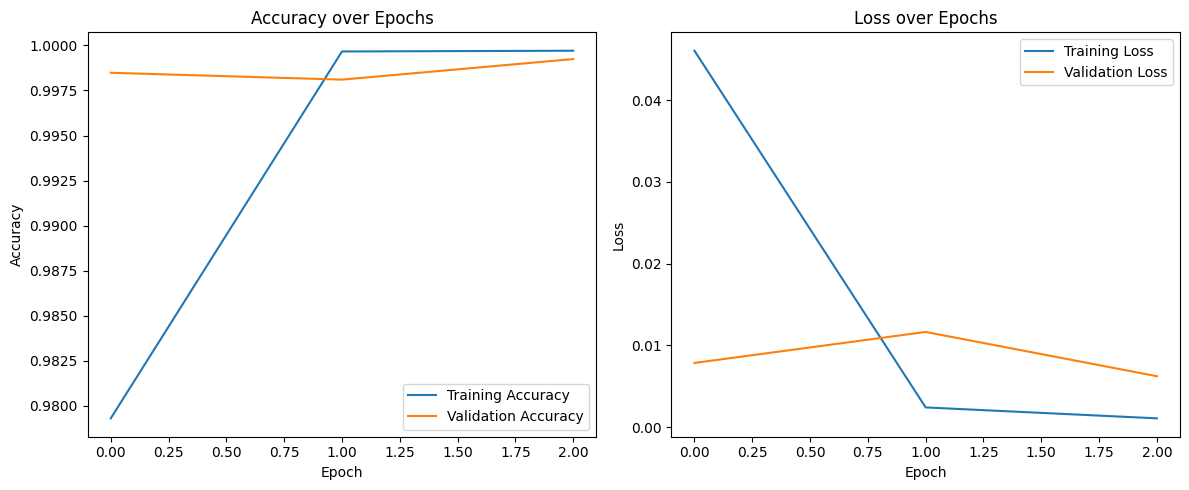

In [58]:
import matplotlib.pyplot as plt

# Assuming 'history1' is the variable storing the training history
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(histroy1.history['accuracy'], label='Training Accuracy')
plt.plot(histroy1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(histroy1.history['loss'], label='Training Loss')
plt.plot(histroy1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


In [59]:
total_words

92248

# TASK #8: ASSESS TRAINED MODEL PERFORMANCE


 ## Model Prediction: Biderectional LSTM model

In [60]:
# make prediction
pred = model.predict(padded_test)

206/206 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step


In [61]:
# if the predicted value is >0.5 it is real else it is fake
prediction = []
for i in range(len(pred)):
    if pred[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [62]:
# getting the accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), prediction)

print("Model Accuracy : ", accuracy)

Model Accuracy :  0.9483125570082092


<Axes: >

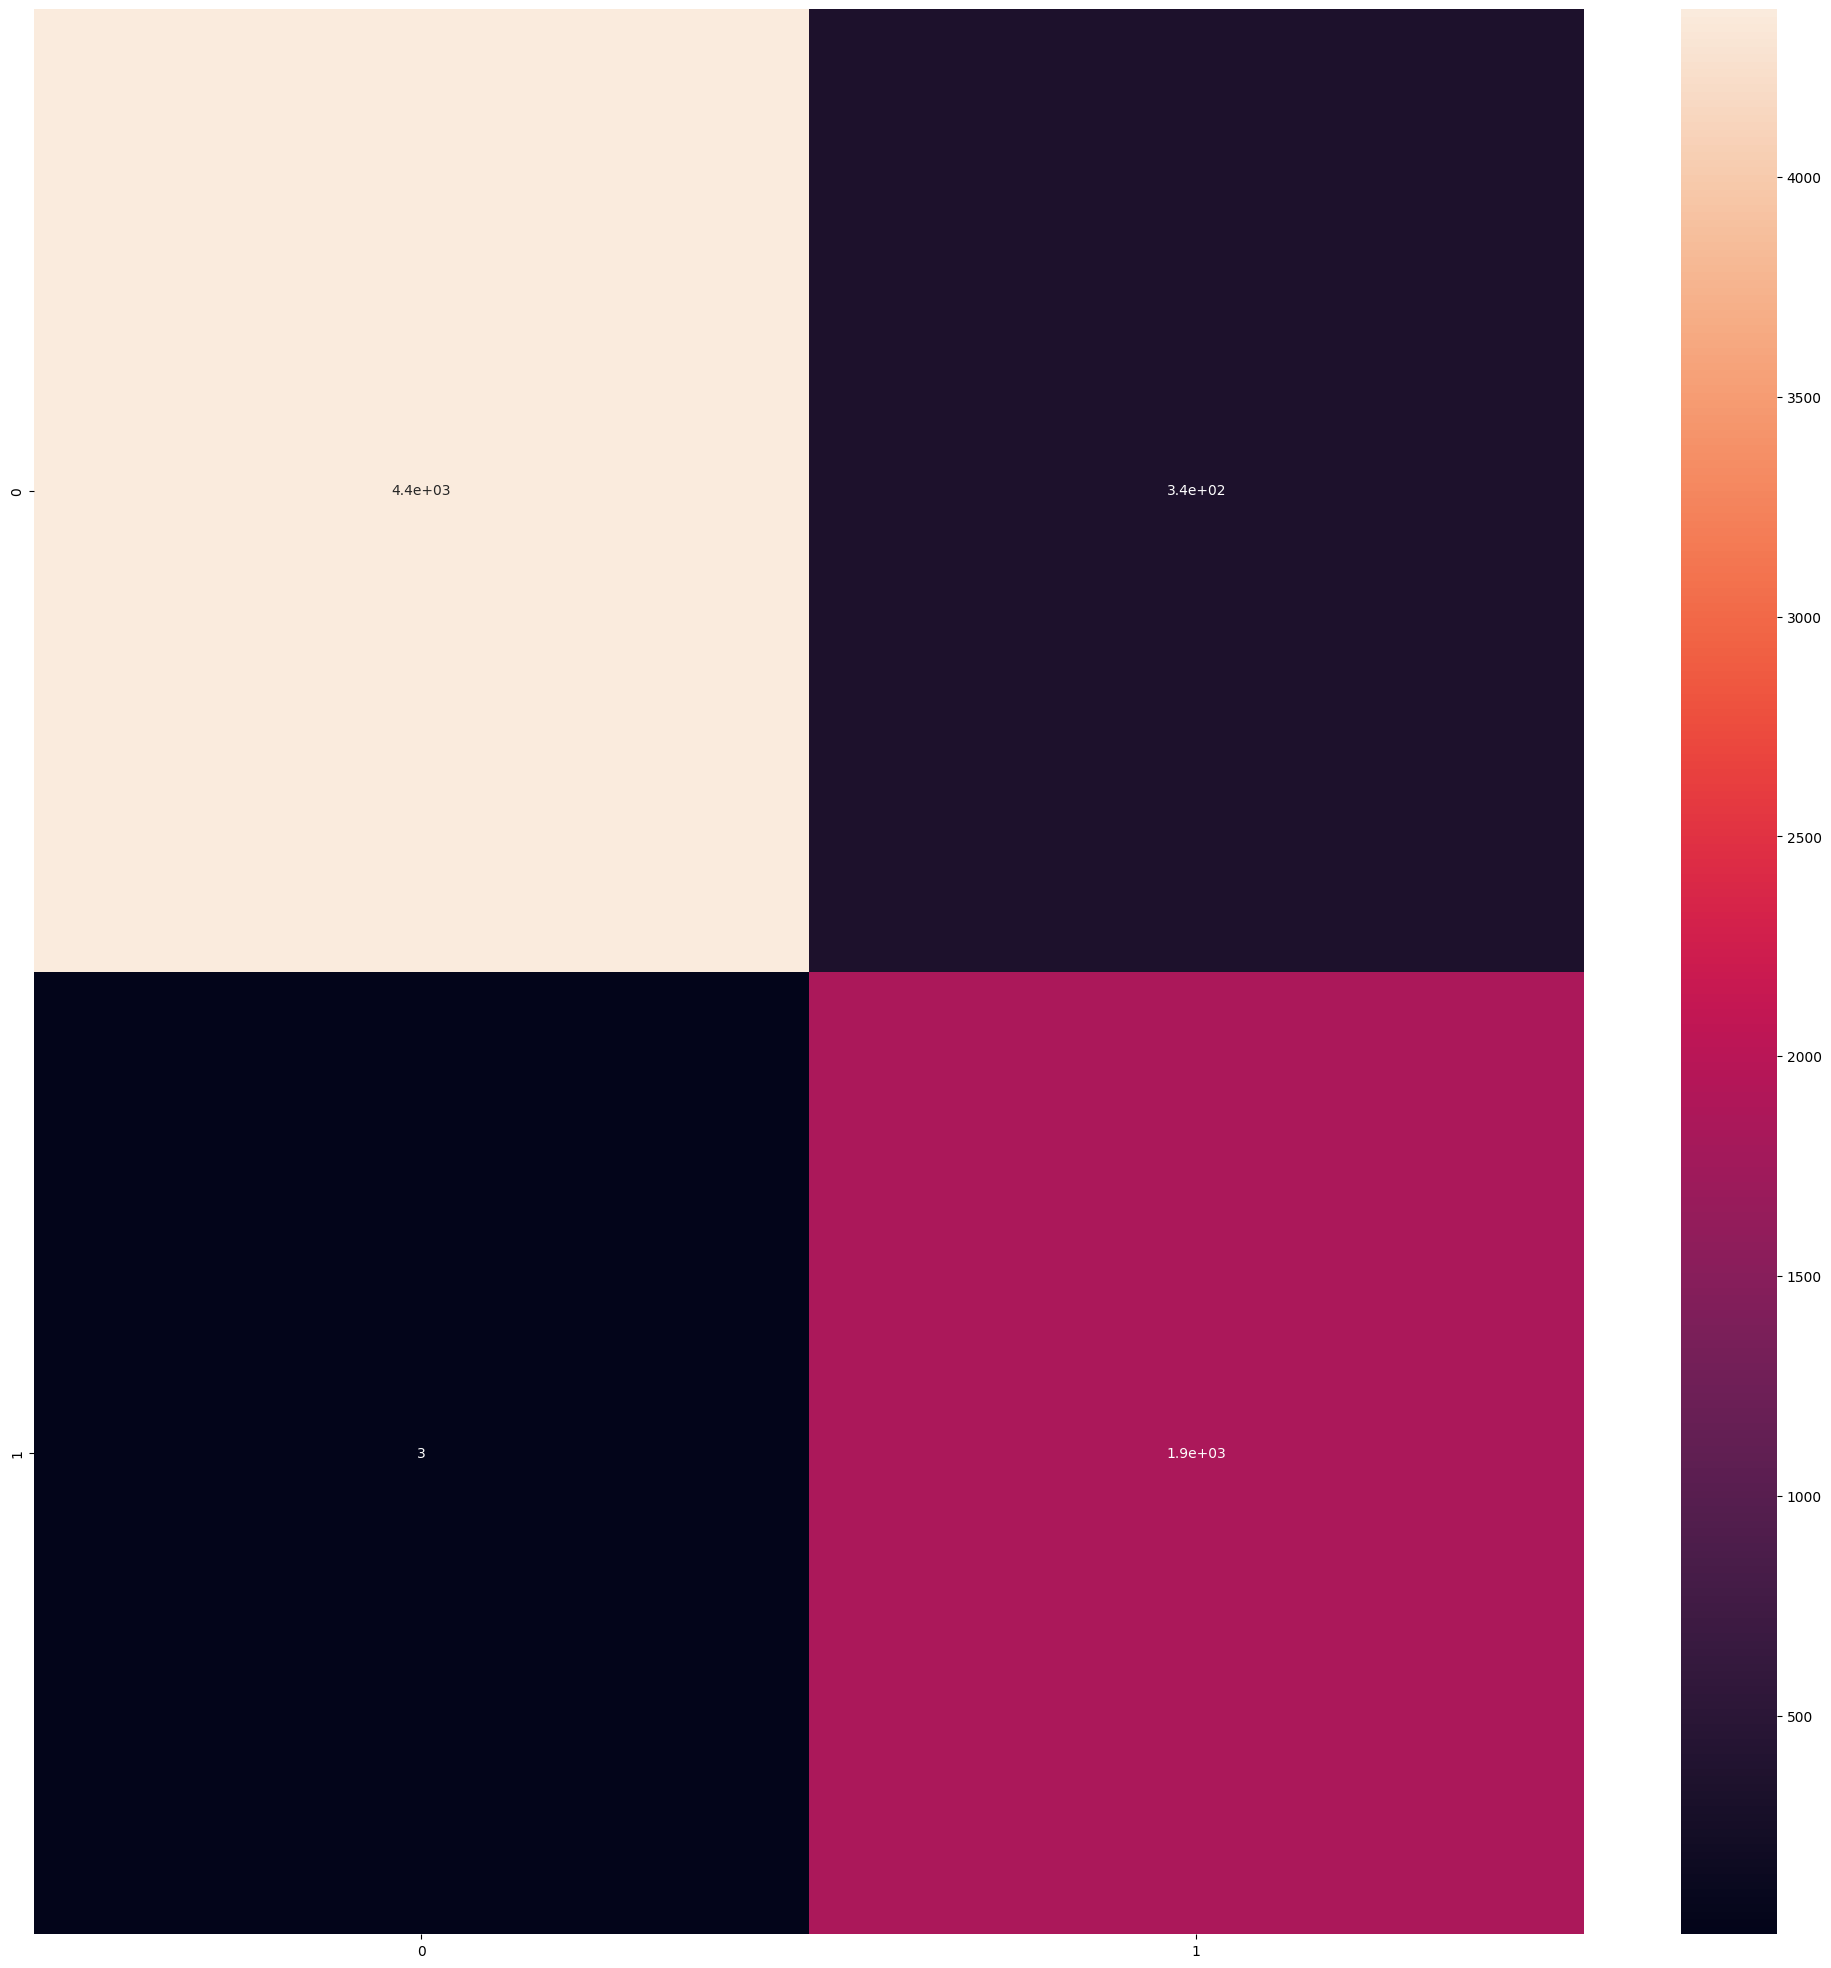

In [63]:
# get the confusion matrix for model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

 ## Model1 Prediction :  CNN-BiLSTM model
 The model combines a 1D Convolutional Neural Network (CNN) with a Bidirectional LSTM (BiLSTM). The CNN captures local patterns in the input sequences, while the BiLSTM captures temporal dependencies in both directions. This hybrid approach is effective for tasks like text classification, where both local patterns and context matter.

In [71]:
# make prediction
pred1 = model1.predict(padded_test)
# if the predicted value is >0.5 it is real else it is fake
prediction1 = []
for i in range(len(pred)):
    if pred1[i].item() > 0.5:
        prediction1.append(1)
    else:
        prediction1.append(0)
# getting the accuracy
from sklearn.metrics import accuracy_score

accuracy1 = accuracy_score(list(y_test), prediction1)

print("Model1 Accuracy : ", accuracy1)

206/206 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step
Model1 Accuracy :  0.9989358467619337


<Axes: >

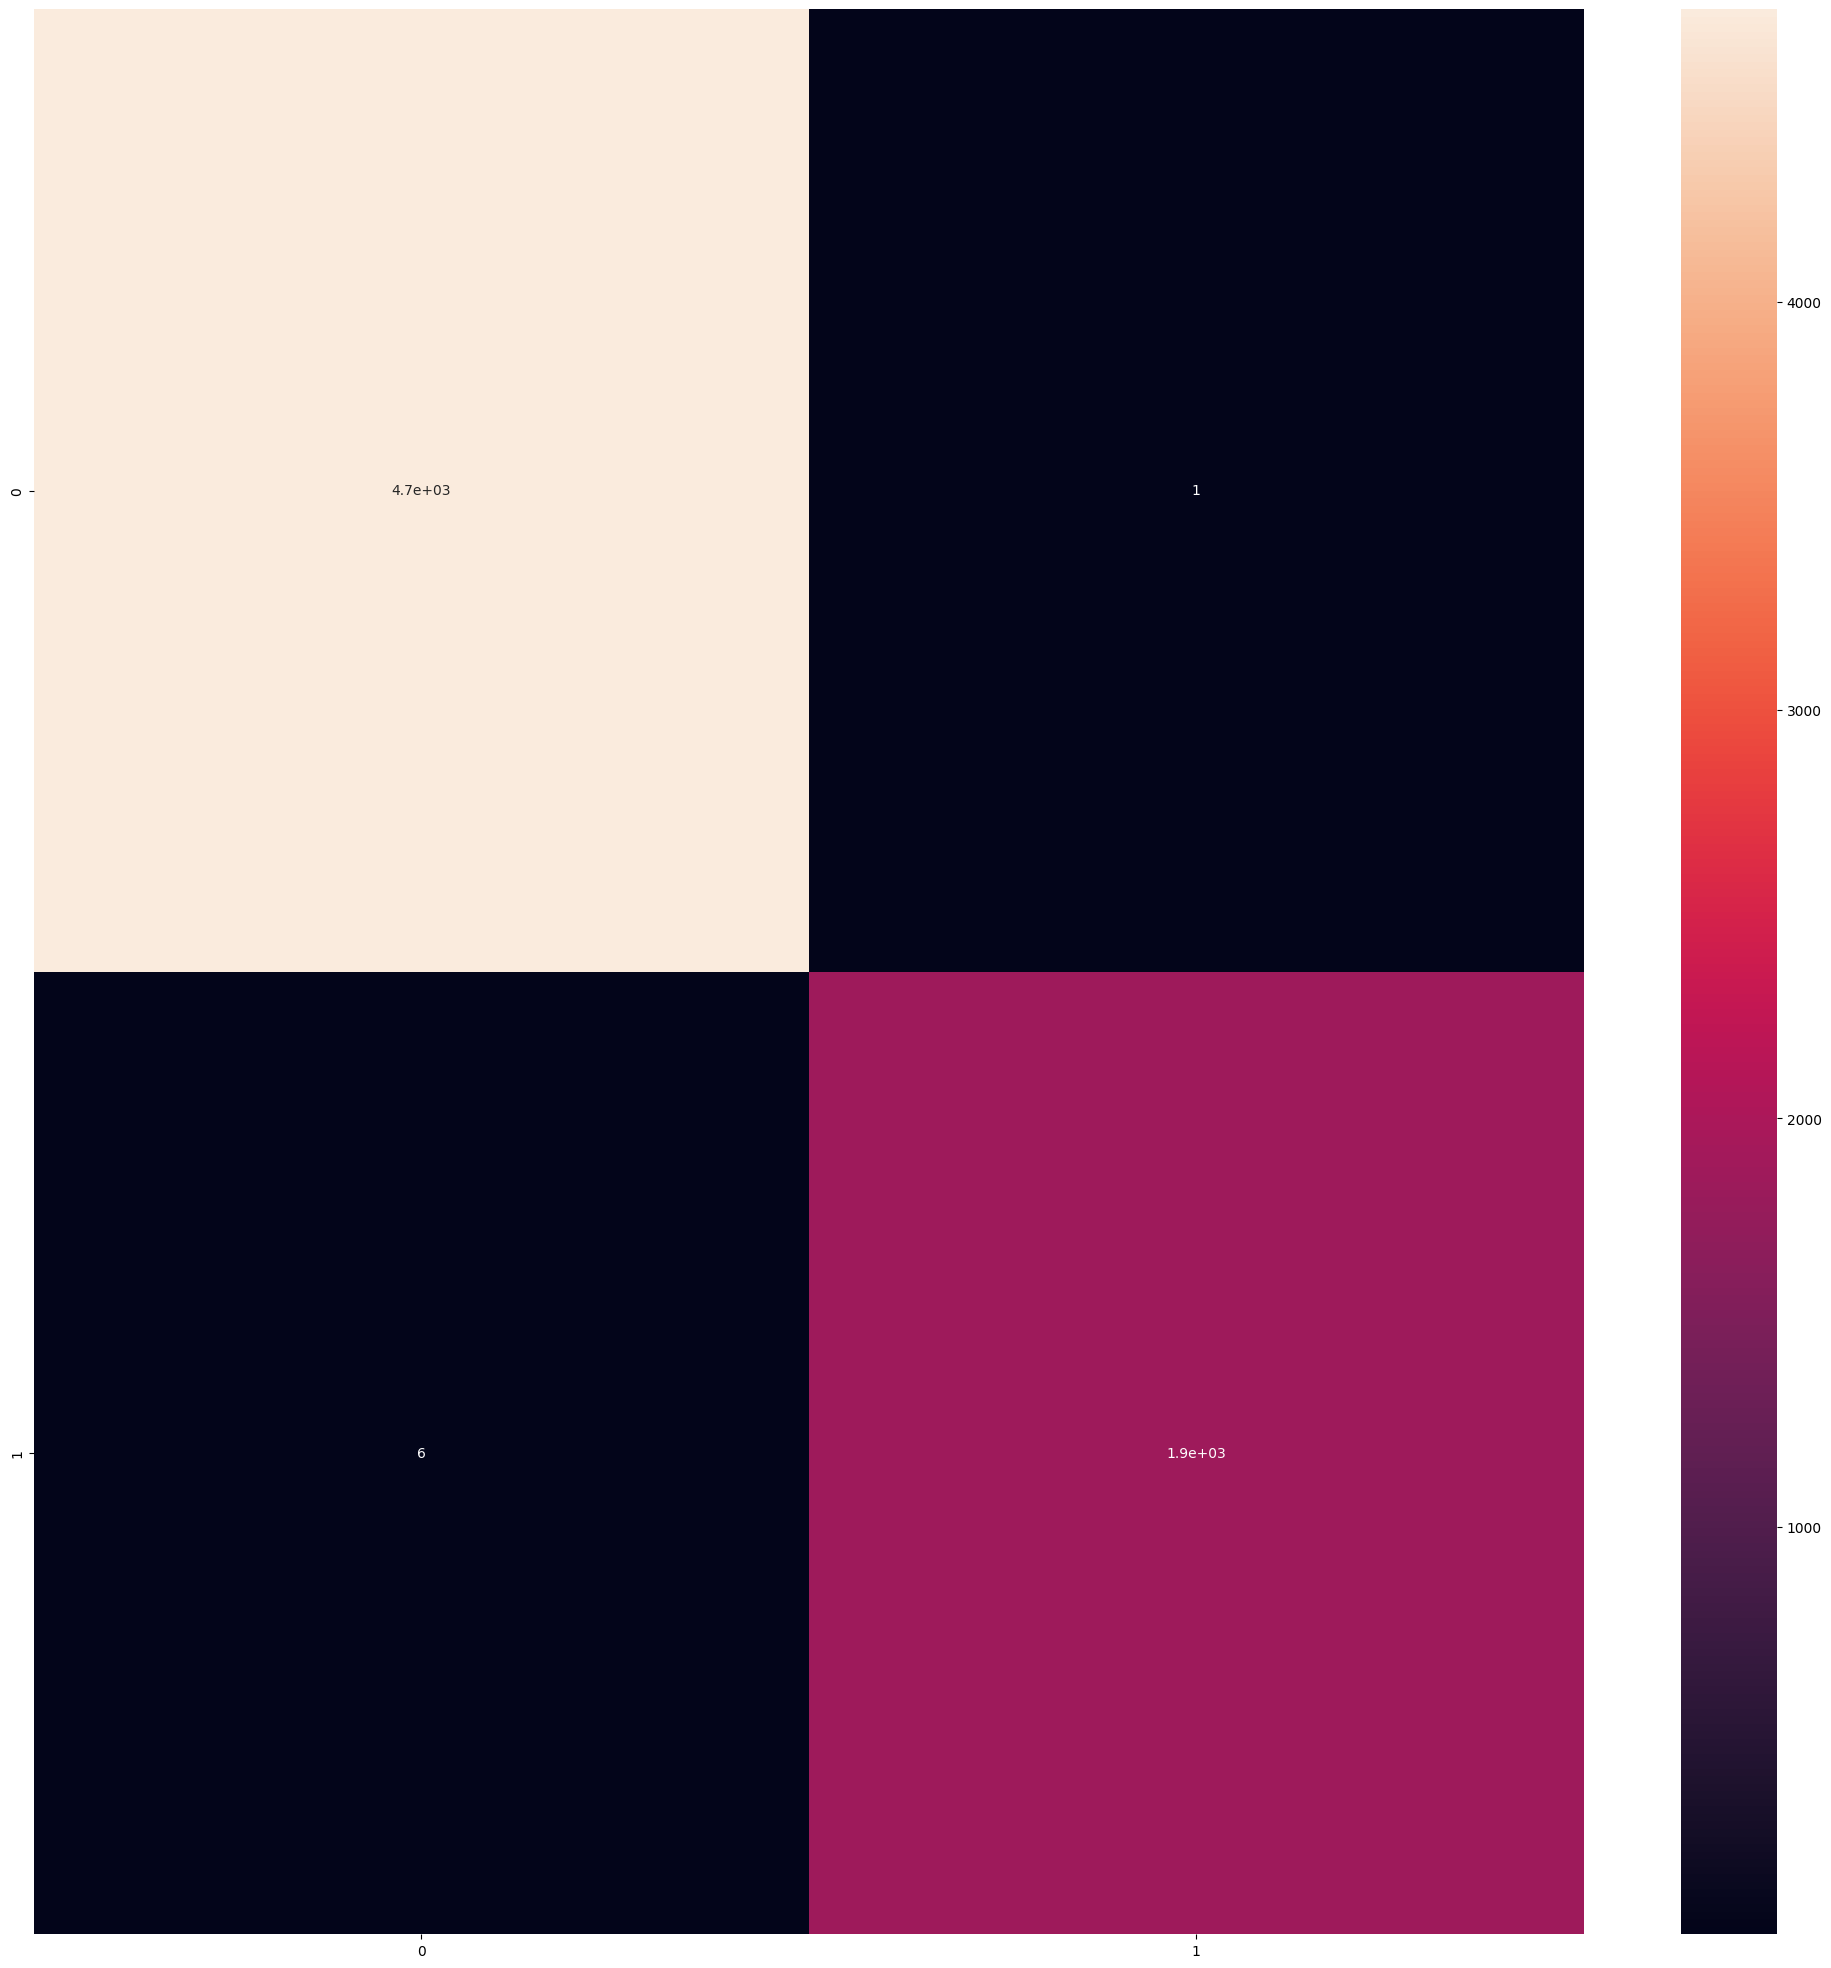

In [72]:
# get the confusion matrix for model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction1)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

MINI CHALLENGE #1

In [73]:
# data containing real news
df_true
# data containing fake news
df_fake
# dataframe information
df_true.info()
# dataframe information
df_fake.info()
# check for null values
df_true.isnull().sum()
# check for null values
df_fake.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9408 entries, 0 to 9407
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    9408 non-null   object
 1   text     9408 non-null   object
 2   subject  9408 non-null   object
 3   date     9408 non-null   object
 4   isfake   9408 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 367.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   isfake   23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB


,0
title,0
text,0
subject,0
date,0
isfake,0


In [74]:
df['original'][5]
df['clean_joined'][5]

'white house congress prepare talks spending immigration west palm beach washington reuters white house said friday kick talks week republican democratic congressional leaders immigration policy government spending issues need wrapped early year expected flurry legislative activity comes republicans democrats begin stage midterm congressional elections november president donald trump republican party eager maintain control congress democrats look openings wrest seats away senate house representatives wednesday trump budget chief mick mulvaney legislative affairs director marc short meet senate majority leader mitch mcconnell house speaker paul ryan republicans democratic counterparts senator chuck schumer representative nancy pelosi white house said followed weekend strategy sessions trump mcconnell ryan camp david presidential retreat maryland according white house senate returns work house congress passed short term government funding week taking christmas break needs come agreement 

MINI CHALLENGE #3:
- Plot the count plot for fake vs. real news

<Axes: xlabel='count', ylabel='isfake'>

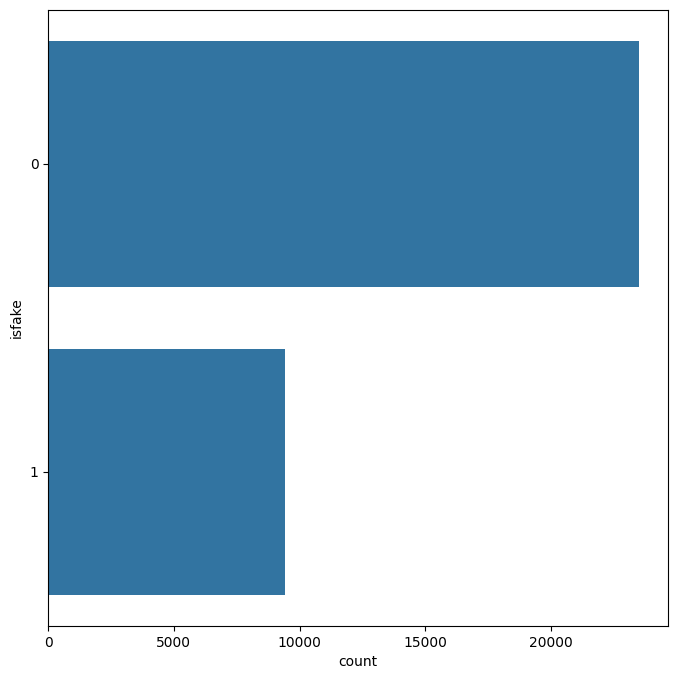

In [75]:
# plot the number of samples per each class
plt.figure(figsize = (8, 8))
sns.countplot(y = "isfake", data = df)

In [78]:
# Import necessary libraries
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

# Save the trained model and tokenizer
def save_model_and_tokenizer(model, tokenizer):
    model.save('model.h5')
    with open('tokenizer.pkl', 'wb') as file:
        pickle.dump(tokenizer, file)

# Load the trained model and tokenizer
def load_model_and_tokenizer():
    model = load_model('model.h5')
    with open('tokenizer.pkl', 'rb') as file:
        tokenizer = pickle.load(file)
    return model, tokenizer

# Preprocess and predict
def predict_news(review):
    model, tokenizer = load_model_and_tokenizer()
    sequences = tokenizer.texts_to_sequences([review])
    padded_sequence = pad_sequences(sequences, maxlen=40, padding='post', truncating='post')
    prediction = model.predict(padded_sequence)
    if prediction[0] < 0.5:
        print("Fake News!")
    else:
        print("Real News")

# Example usage
save_model_and_tokenizer(model, tokenizer)  # Save your model and tokenizer
predict_news("This is an example news article.")  # Predict new data


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
Real News


In [82]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_20newsgroups

# Define or load your trained model and vectorizer
def train_model():
    # Example dataset - replace with your own dataset
    data = fetch_20newsgroups(subset='train', categories=['rec.sport.baseball', 'sci.med'])
    X_train = data.data
    y_train = data.target

    # Initialize and train vectorizer and model
    vectorizer = TfidfVectorizer()
    X_train_transformed = vectorizer.fit_transform(X_train)

    model = LogisticRegression()
    model.fit(X_train_transformed, y_train)

    return model, vectorizer

def save_model_and_vectorizer(model, vectorizer):
    with open('model.pkl', 'wb') as model_file:
        pickle.dump(model, model_file)
    with open('vectorizer.pkl', 'wb') as vectorizer_file:
        pickle.dump(vectorizer, vectorizer_file)

def load_model_and_vectorizer():
    with open('model.pkl', 'rb') as model_file:
        model = pickle.load(model_file)
    with open('vectorizer.pkl', 'rb') as vectorizer_file:
        vectorizer = pickle.load(vectorizer_file)
    return model, vectorizer

def predict_news(review):
    model, vectorizer = load_model_and_vectorizer()
    review_vector = vectorizer.transform([review])
    prediction = model.predict(review_vector)
    if prediction[0] == 0:
        print("Fake News!")
    else:
        print("Real News")

# Example usage
model, vectorizer = train_model()  # Train your model and vectorizer
save_model_and_vectorizer(model, vectorizer)  # Save your trained model and vectorizer
predict_news("This is an example news article.")  # Predict new data


Real News


In [83]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_20newsgroups

# Example dataset - replace with your own dataset
data = fetch_20newsgroups(subset='train', categories=['rec.sport.baseball', 'sci.med'])
X_train = data.data
y_train = data.target

# Initialize and train vectorizer and model
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)

model = LogisticRegression()
model.fit(X_train_transformed, y_train)

# Save the trained model and vectorizer
with open('model1.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)
with open('vectorizer1.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)
